In [ ]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.5.1 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.11.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
pyerfa 2.0.0.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
opencv-python 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
opencv-python-headless 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
opencv-contrib-python 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
matplotlib 3.7.1 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
l

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 1200,900
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 525.85.12'
b'NVIDIA Corporation'


In [ ]:
def  addvertex(x,y):
  gl.glVertex2f(x/(WIDTH/2),y/(HEIGHT/2))

Enter last two digits: 60


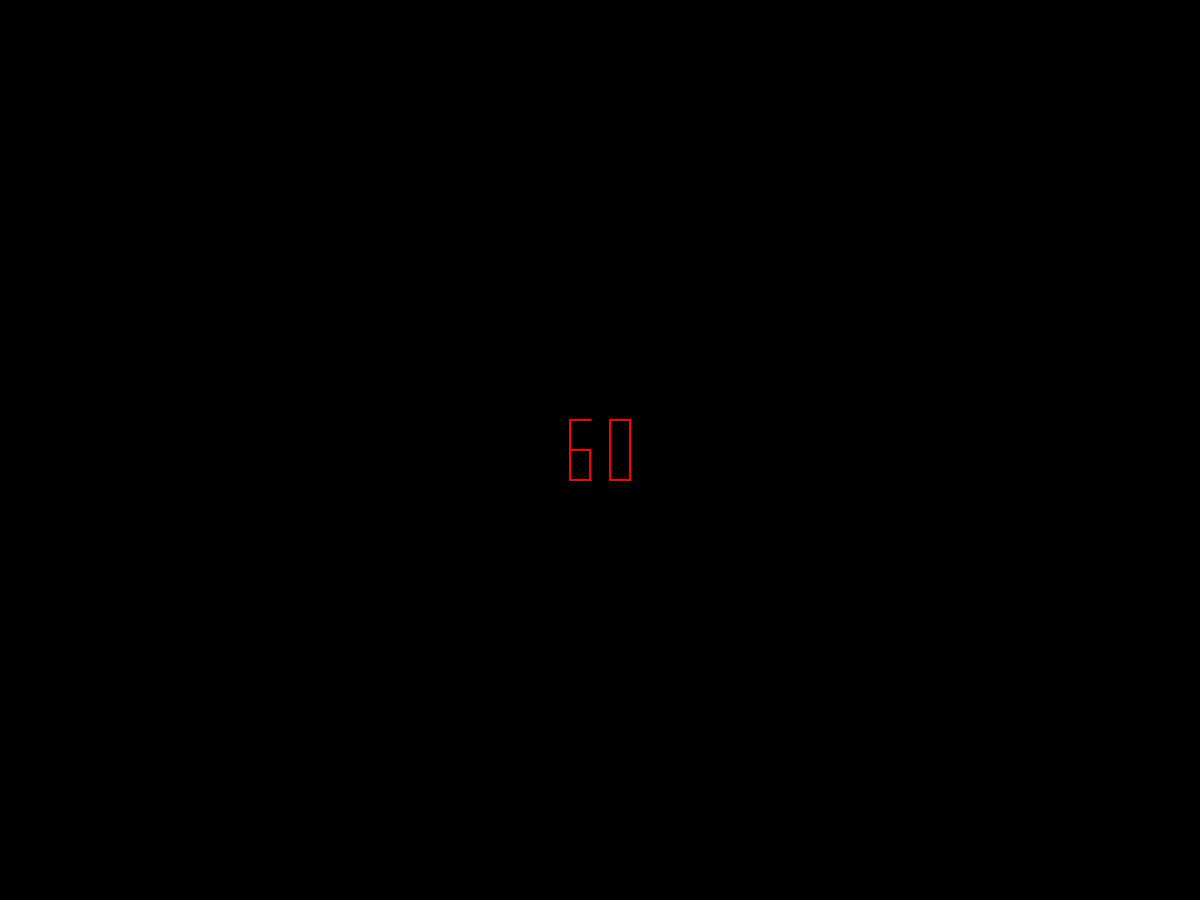

In [ ]:
from IPython.display import display
from PIL import Image
import random

gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glPointSize(2)

def findzone(x1,y1,x2,y2):
         dx=x2-x1
         dy=y2-y1
         if(abs(dx)>abs(dy)):
           if(dx>0 and dy>0):
             return 0
           elif(dx<0 and dy>0):
             return 3
           elif( dx<0 and dy<0):
             return 4
           else:
             return 7
         elif(abs(dx)<abs(dy)):
          if(dx>0 and dy>0):
             return 1
          elif(dx<0 and dy>0):
            return 2
          elif( dx<0 and dy<0):
            return 5
          else:
            return 6
         else:
           if(dx==dy):
             if(dx>0 and dy>0):
                return 1
             else:
               return 5
           else:
             if(dx<0 and dy>0):
               return 2
             else:
               return 6


def converttozone_0(z,x1,y1,x2,y2):
  if(z==0):
    return x1,y1,x2,y2
  elif(z==1):
    return y1,x1,y2,x2
  elif(z==2):
    return y1,-x1,y2,-x2
  elif(z==3):
    return -x1,y1,-x2,y2
  elif(z==4):
    return -x1,-y1,-x2,-y2
  elif(z==5):
    return -y1,-x1,-y2,-x2
  elif(z==6):
    return -y1,x1,-y2,x2
  else:
    return x1,-y1,x2,-y2

def convertZoneO_ToOriginal(z,x1,y1):
  if(z==0):
    return x1,y1
  elif(z==1):
    return y1,x1
  elif(z==2):
    return -y1,x1
  elif(z==3):
    return -x1,y1
  elif(z==4):
    return -x1,-y1
  elif(z==5):
    return -y1,-x1
  elif(z==6):
    return y1,-x1
  else:
    return x1,-y1

def DrawLine(x1,y1,x2,y2):
  if(x1>x2 and y1>y2):
    tem1=x1
    tem2=y1
    x1,y1=x2,y2
    x2,y2=tem1,tem2

  zone_to_convert=findzone(x1,y1,x2,y2)
  converted_coordinates=converttozone_0(zone_to_convert,x1,y1,x2,y2)

  x1,y1,x2,y2=converted_coordinates[0],converted_coordinates[1],converted_coordinates[2],converted_coordinates[3]

  dx=x2-x1
  dy=y2-y1
  d=2*dy-dx
  incE=2*dy
  incNE=2*(dy-dx)
  y=y1
  x=x1
  gl.glColor3f(255,0,0)
  gl.glBegin(gl.GL_POINTS)

  while(x<=x2):
    temx=convertZoneO_ToOriginal(zone_to_convert,x,y)
    addvertex(temx[0],temx[1])
    if(d>0):
      d = d + incNE
      y = y + 0.01
    else:
      d = d + incE
    x+=0.01
  gl.glEnd()




def Print_output(temp):
  x,y = int(temp[0]),int(temp[1])
 


    

  if x== 0:
    DrawLine(-30,30,-10,30)
    DrawLine(-30,30,-30,-30)
    DrawLine(-30,-30,-10,-30)
    DrawLine(-10,30,-10,-30)

  elif x==1:
    DrawLine(-10,30,-10,-30)

  elif x==2:
    DrawLine(-30,30,-10,30)
    DrawLine(-10,30,-10,0)
    DrawLine(-30,0,-10,0)
    DrawLine(-30,0,-30,-30)
    DrawLine(-30,-30,-10,-30)

  elif x==3:
    DrawLine(-30,30,-10,30)
    DrawLine(-10,30,-10,0)
    DrawLine(-30,0,-10,0)
    DrawLine(-10,0,-10,-30)
    DrawLine(-30,-30,-10,-30)

  elif x==4:
    DrawLine(-30,30,-30,0)
    DrawLine(-30,0,-10,0)
    DrawLine(-30,0,-10,0)
    DrawLine(-10,30,-10,-30)

  elif x==5:
    DrawLine(-30,30,-10,30)
    DrawLine(-30,30,-30,0)
    DrawLine(-30,0,-10,0)
    DrawLine(-10,0,-10,-30)
    DrawLine(-30,-30,-10,-30)

  elif x==6:
    DrawLine(-30,30,-10,30)
    DrawLine(-30,30,-30,-30)
    DrawLine(-30,-30,-10,-30)
    DrawLine(-10,0,-10,-30)
    DrawLine(-30,0,-10,0)

  elif x==7:
    DrawLine(-30,30,-10,30)
    DrawLine(-10,30,-10,-30)

  elif x==8:
    DrawLine(-30,30,-10,30)
    DrawLine(-30,30,-30,-30)
    DrawLine(-30,-30,-10,-30)
    DrawLine(-10,30,-10,-30)
    DrawLine(-30,0,-10,0)
  else:
    DrawLine(-30,30,-10,30)
    DrawLine(-30,30,-30,0)
    DrawLine(-30,-30,-10,-30)
    DrawLine(-10,30,-10,-30)
    DrawLine(-30,0,-10,0)
#------------------------------------
  if y==0:
    DrawLine(10,30,30,30)
    DrawLine(10,30,10,-30)
    DrawLine(10,-30,30,-30)
    DrawLine(30,30,30,-30)

  elif y==1:
    DrawLine(30,30,30,-30)

  elif y==2:
    DrawLine(10,30,30,30)
    DrawLine(30,30,30,0)
    DrawLine(10,0,30,0)
    DrawLine(10,0,10,-30)
    DrawLine(10,-30,30,-30)

  elif y==3:
    DrawLine(10,30,30,30)
    DrawLine(30,30,30,0)
    DrawLine(10,0,30,0)
    DrawLine(30,0,30,-30)
    DrawLine(10,-30,30,-30)

  elif y==4:
    DrawLine(10,30,10,0)
    DrawLine(-30,0,-10,0)
    DrawLine(10,0,30,0)
    DrawLine(30,30,30,-30)

  elif y==5:
    DrawLine(10,30,30,30)
    DrawLine(10,30,10,0)
    DrawLine(10,0,30,0)
    DrawLine(30,0,30,-30)
    DrawLine(10,-30,30,-30)

  elif y==6:
    DrawLine(10,30,30,30)
    DrawLine(10,30,10,-30)
    DrawLine(10,-30,30,-30)
    DrawLine(30,0,30,-30)
    DrawLine(10,0,30,0)

  elif y==7:
    DrawLine(10,30,30,30)
    DrawLine(30,30,30,-30)

  elif y==8:
    DrawLine(10,30,30,30)
    DrawLine(10,30,10,-30)
    DrawLine(10,-30,30,-30)
    DrawLine(30,30,30,-30)
    DrawLine(10,0,30,0)
  else:
    DrawLine(10,30,30,30)
    DrawLine(10,30,10,0)
    DrawLine(10,-30,30,-30)
    DrawLine(30,30,30,-30)
    DrawLine(10,0,30,0)

Print_output(input('Enter last two digits: '))

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))